In [3]:
import numpy as np
import matplotlib.pyplot as plt 

step 2actiavtion ftn and derivative

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return x*(1-x)

step 3 input x and output y

In [7]:
x = np.array([[0,0]
            ,[0,1]
            ,[1,0]
            ,[1,1] ])
y = np.array([[0],[1],[1],[0]])

step 4intialize network parameter

In [9]:
np.random.seed(42)
input_size =2
hidden_size = 3
output_size = 1
w1 =np.random.randn(input_size,hidden_size)*0.1
b1 = np.zeros((1,hidden_size))
w2 = np.random.randn(hidden_size,output_size)*0.1
b2 = np.zeros((1,output_size))
learning_rate = 0.1

step 5 forward propagation

In [10]:
def forward_propagation(x):
    z1 = np.dot(x,w1)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1,w2)+b2
    a2 = sigmoid(z2)
    y_pred = a2
    return z1,a1,z2,y_pred

step 6 calculate loss ftn(mse)

In [11]:
def mse_loss(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

step 7 backpropagation

In [13]:
def backpropagation(x,y,z1,a1,z2,y_pred):
    global w1,b1,w2,b2
    output_error = y_pred - y
    d_output = output_error * sigmoid_derivative(y_pred)
    dw2 = np.dot(a1.T,d_output)
    db2 = np.sum(d_output,axis=0,keepdims=True)
    hidden_error = np.dot(d_output,w2.T)
    d_hidden = hidden_error * sigmoid_derivative(a1)
    dw1 = np.dot(x.T,d_hidden)
    db1 = np.sum(d_hidden,axis=0,keepdims=True)
    return dw1,db1,dw2,db2

step 8 update weights & bias

In [15]:
def update_parameters(dw1,db1,dw2,db2,lr):
    global w1,b1,w2,b2
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2

step 9 training loop

In [31]:
epochs = 50
losses = []

for epoch in range(epochs):
    z1, a1, z2, y_pred = forward_propagation(x)
    
    loss = mse_loss(y, y_pred)
    losses.append(loss)

    dW1, db1, dW2, db2 = backpropagation(x, y, z1, a1, z2, y_pred)
    update_parameters(dW1, db1, dW2, db2, learning_rate)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2500


step 10 visualize loss vs epochs

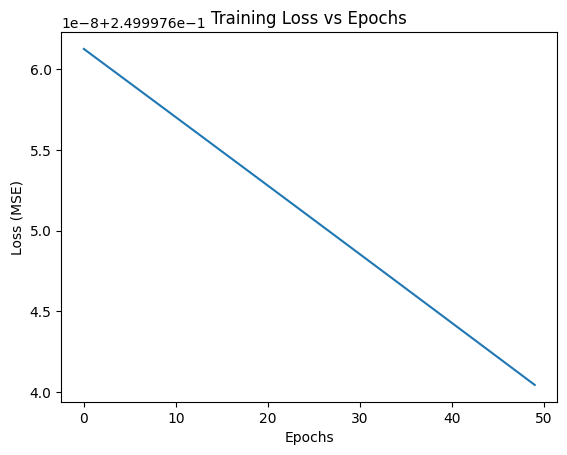

In [32]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")
plt.show()


step 10 test the model

In [33]:
predictions = forward_propagation(x)
print("Final Predictions:")
print(predictions)

Final Predictions:
(array([[ 0.022609  , -0.00062039,  0.00257899],
       [ 0.19473166, -0.0284268 , -0.01508614],
       [ 0.12415116, -0.01508595,  0.07041816],
       [ 0.29627382, -0.04289236,  0.05275303]]), array([[0.50565201, 0.4998449 , 0.50064475],
       [0.54852966, 0.49289378, 0.49622854],
       [0.53099798, 0.49622858, 0.51759727],
       [0.57353137, 0.48927855, 0.5131852 ]]), array([[-0.00384919],
       [ 0.0019825 ],
       [-0.00187756],
       [ 0.00390698]]), array([[0.4990377 ],
       [0.50049563],
       [0.49953061],
       [0.50097674]]))
